# Gradient descent algorithm
---
Author: *Jorge Barrio Conde*

Date: *2020/21*

Description:

**Import libraries**

- Numpy: library of numerical calculus, linear algebra...
- Scipy: it's an extension of Numpy
- Matplotlib: library for data visualization



In [1]:
import numpy as np
import scipy as sc

import matplotlib.pyplot as plt

**Define the function**

We can optimize any function that is derivable. For this example we will use a function taken from the examples section of [wikipedia](https://en.wikipedia.org/wiki/Gradient_descent#:~:text=Gradient%20descent%20is%20a%20first,the%20direction%20of%20steepest%20descent.).

lambda: anonymous function

In [2]:
func = lambda th: np.sin(1/2 * th[0] ** 2 - 1 / 4 * th[1] ** 2 + 3) * np.cos(2 * th[0] + 1 - np.e ** th[1])

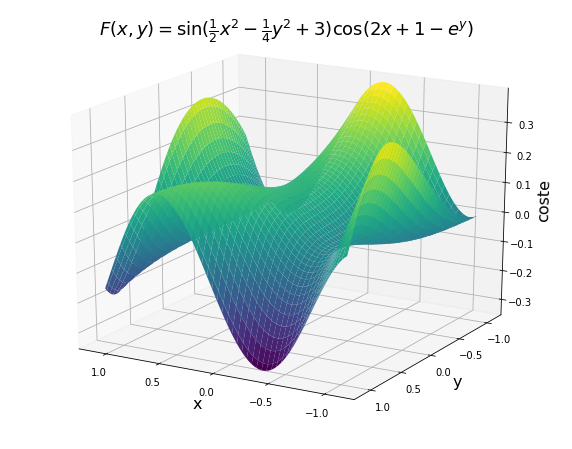

In [3]:
# 3D Graph:
from mpl_toolkits import mplot3d
from matplotlib import cm

x_range = 1.1
y_range = x_range

x = np.linspace(-x_range, x_range, 100)
y = np.linspace(-y_range, y_range, 100)

X, Y = np.meshgrid(x,y)
Z = func([X,Y])

fig = plt.figure(figsize=(10,8))
ex = plt.axes(projection = '3d')
ex.plot_surface(X, Y, Z, cmap=cm.viridis)   # cm.magma
ex.set_xlabel('x', fontsize=16)
ex.set_xticks([-1, -0.5, 0, 0.5, 1])
ex.set_ylabel('y', fontsize=16)
ex.set_yticks([-1, -0.5, 0, 0.5, 1])
ex.set_zlabel('coste', fontsize=16)
ex.set_title(r'$F(x,y) = \sin{(\frac{1}{2}x^2 - \frac{1}{4}y^2 + 3)} \cos{(2x + 1 -e^y)}$', fontsize=18)

ex.view_init(20, 120)    # rotation(x-y, z)

In [4]:
resolution = 100

# Set 100 values for the X and Y axis between -3 and 3
_X = np.linspace(-3,3,resolution)   
_Y = np.linspace(-3,3,resolution)

_Z = np.zeros((resolution, resolution))

for ix, x in enumerate(_X):
    for iy, y in enumerate(_Y):
        _Z[iy,ix] = func([x, y])

num_rings = 100

In [5]:
def gradient_descent_graph(start=[0,0], lr=0.01):
    '''
    Shows the process of the gradient descent algorithm
    '''
    # Figure
    ccon = plt.contourf(_X, _Y, _Z, num_rings)
    plt.colorbar()

    # Starter point
    Theta = np.zeros(2, dtype=float)
    Theta[0] = start[0]
    Theta[1] = start[1]

    # Initialize gradient 
    gradient = np.zeros(2)
    h = 0.001

    # Show starter point
    plt.plot(Theta[0], Theta[1], "o", c="white")

    # Save first 
    losses = [func(Theta)]

    for epoch in range(10000):
        for it, th in enumerate(Theta):
            # We will use the definition of the partial derivative
            _T = np.copy(Theta)
            _T[it] = _T[it] + h     # Add a small modification
            deriv = (func(_T) - func(Theta)) / h    # Partial derivative
            gradient[it] = deriv    # Add partial derivative to gradient

        Theta = Theta - lr * gradient   # Update values

        # Show current point
        plt.plot(Theta[0], Theta[1], ".", c="red")

        # Save current loss
        if epoch % 100 == 0:
            losses.append(func(Theta))

    # Show result 
    description = "Ratio de aprendizaje: " + str(lr)
    ccon.ax.set_title(description) 
    plt.plot(Theta[0], Theta[1], "o", c="orange")
    plt.show()

    return losses

**Test cases:**

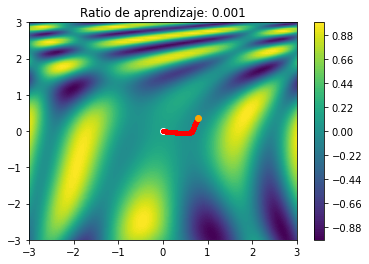

In [6]:
losses_small = gradient_descent_graph(start=[0,0], lr=0.001)

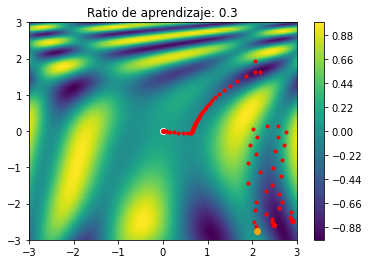

In [7]:
losses_big = gradient_descent_graph(start=[0,0], lr=0.3)

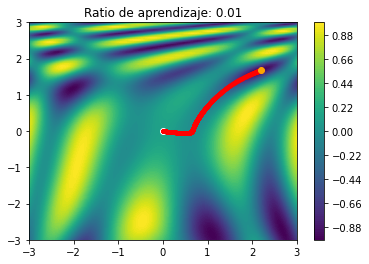

In [8]:
losses_good = gradient_descent_graph(start=[0,0], lr=0.01)

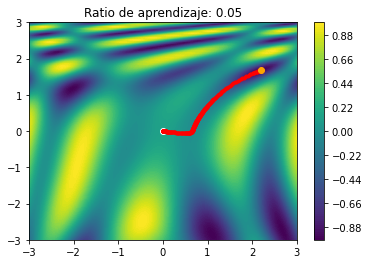

In [9]:
losses_optimal = gradient_descent_graph(start=[0,0], lr=0.05)

101
101


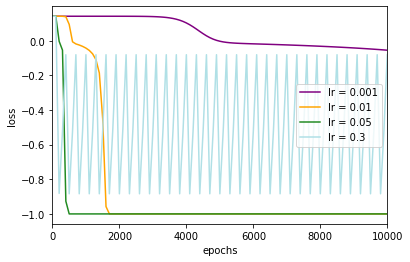

In [10]:
print(len(losses_big))
print(len(list(range(0, 10001, 100))))
plt.plot(list(range(0, 10001, 100)), losses_small, label='lr = 0.001', color='purple')
plt.plot(list(range(0, 10001, 100)), losses_good, label='lr = 0.01', color='orange')
plt.plot(list(range(0, 10001, 100)), losses_optimal, label='lr = 0.05', color='forestgreen')
plt.plot(list(range(0, 10001, 100)), losses_big, label='lr = 0.3', color='powderblue')
plt.legend()
plt.margins(x=0)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

**Relative minimum points:**

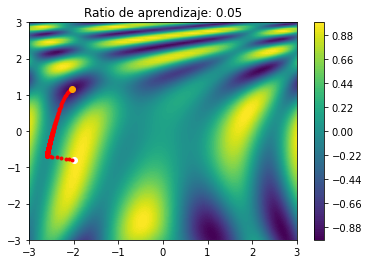

In [11]:
losses_deep = gradient_descent_graph(start=[-2,-0.8], lr=0.05)

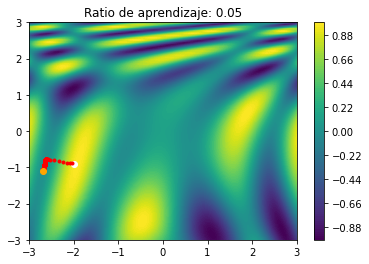

In [12]:
losses_shallow = gradient_descent_graph(start=[-2,-0.9], lr=0.05)

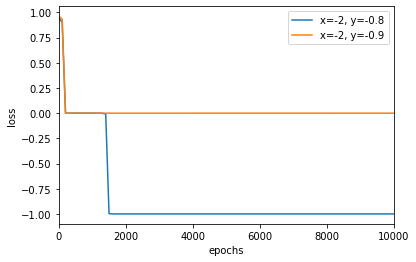

In [13]:
plt.plot(list(range(0, 10001, 100)), losses_deep, label='x=-2, y=-0.8')
plt.plot(list(range(0, 10001, 100)), losses_shallow, label='x=-2, y=-0.9')
plt.legend()
plt.margins(x=0)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

**Random starter point:**

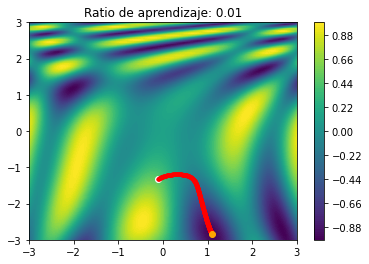

In [ ]:
# Random starter point
rnd = np.random.rand(2)*6-3   # rand()*6 = range[0,6] ; rand()*6-3 -> range[-3,3]
gradient_descent_graph(start=rnd)